In [158]:
import numpy as np
import pandas as pd

In [159]:
def mean_abs_error(y_hat, y):
    return np.mean(np.sum(y_hat - y))

In [160]:
def square_error(y_hat, y):
    return np.mean(np.sum(np.power(y_hat - y, 2)))

In [161]:
a = np.array([1.0, 2.0])
b = np.array([1.02, 5.97])

print("Square error: " + str(square_error(b, a)))
print("Mean Absolute error: " + str(mean_abs_error(b, a)))

Square error: 15.761299999999999
Mean Absolute error: 3.9899999999999998


In [162]:
import os
import tarfile
from six.moves import urllib

In [163]:
DOWNLOAD_ROOT = "https://github.com/killakalle/ageron_handson-ml/raw/master/"
HOUSING_PATH = "datasets/housing/"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "housing.tgz"

In [164]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
        if not os.path.isdir(housing_path):
            os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

In [165]:
fetch_housing_data()

In [166]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [167]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [168]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [169]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [170]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


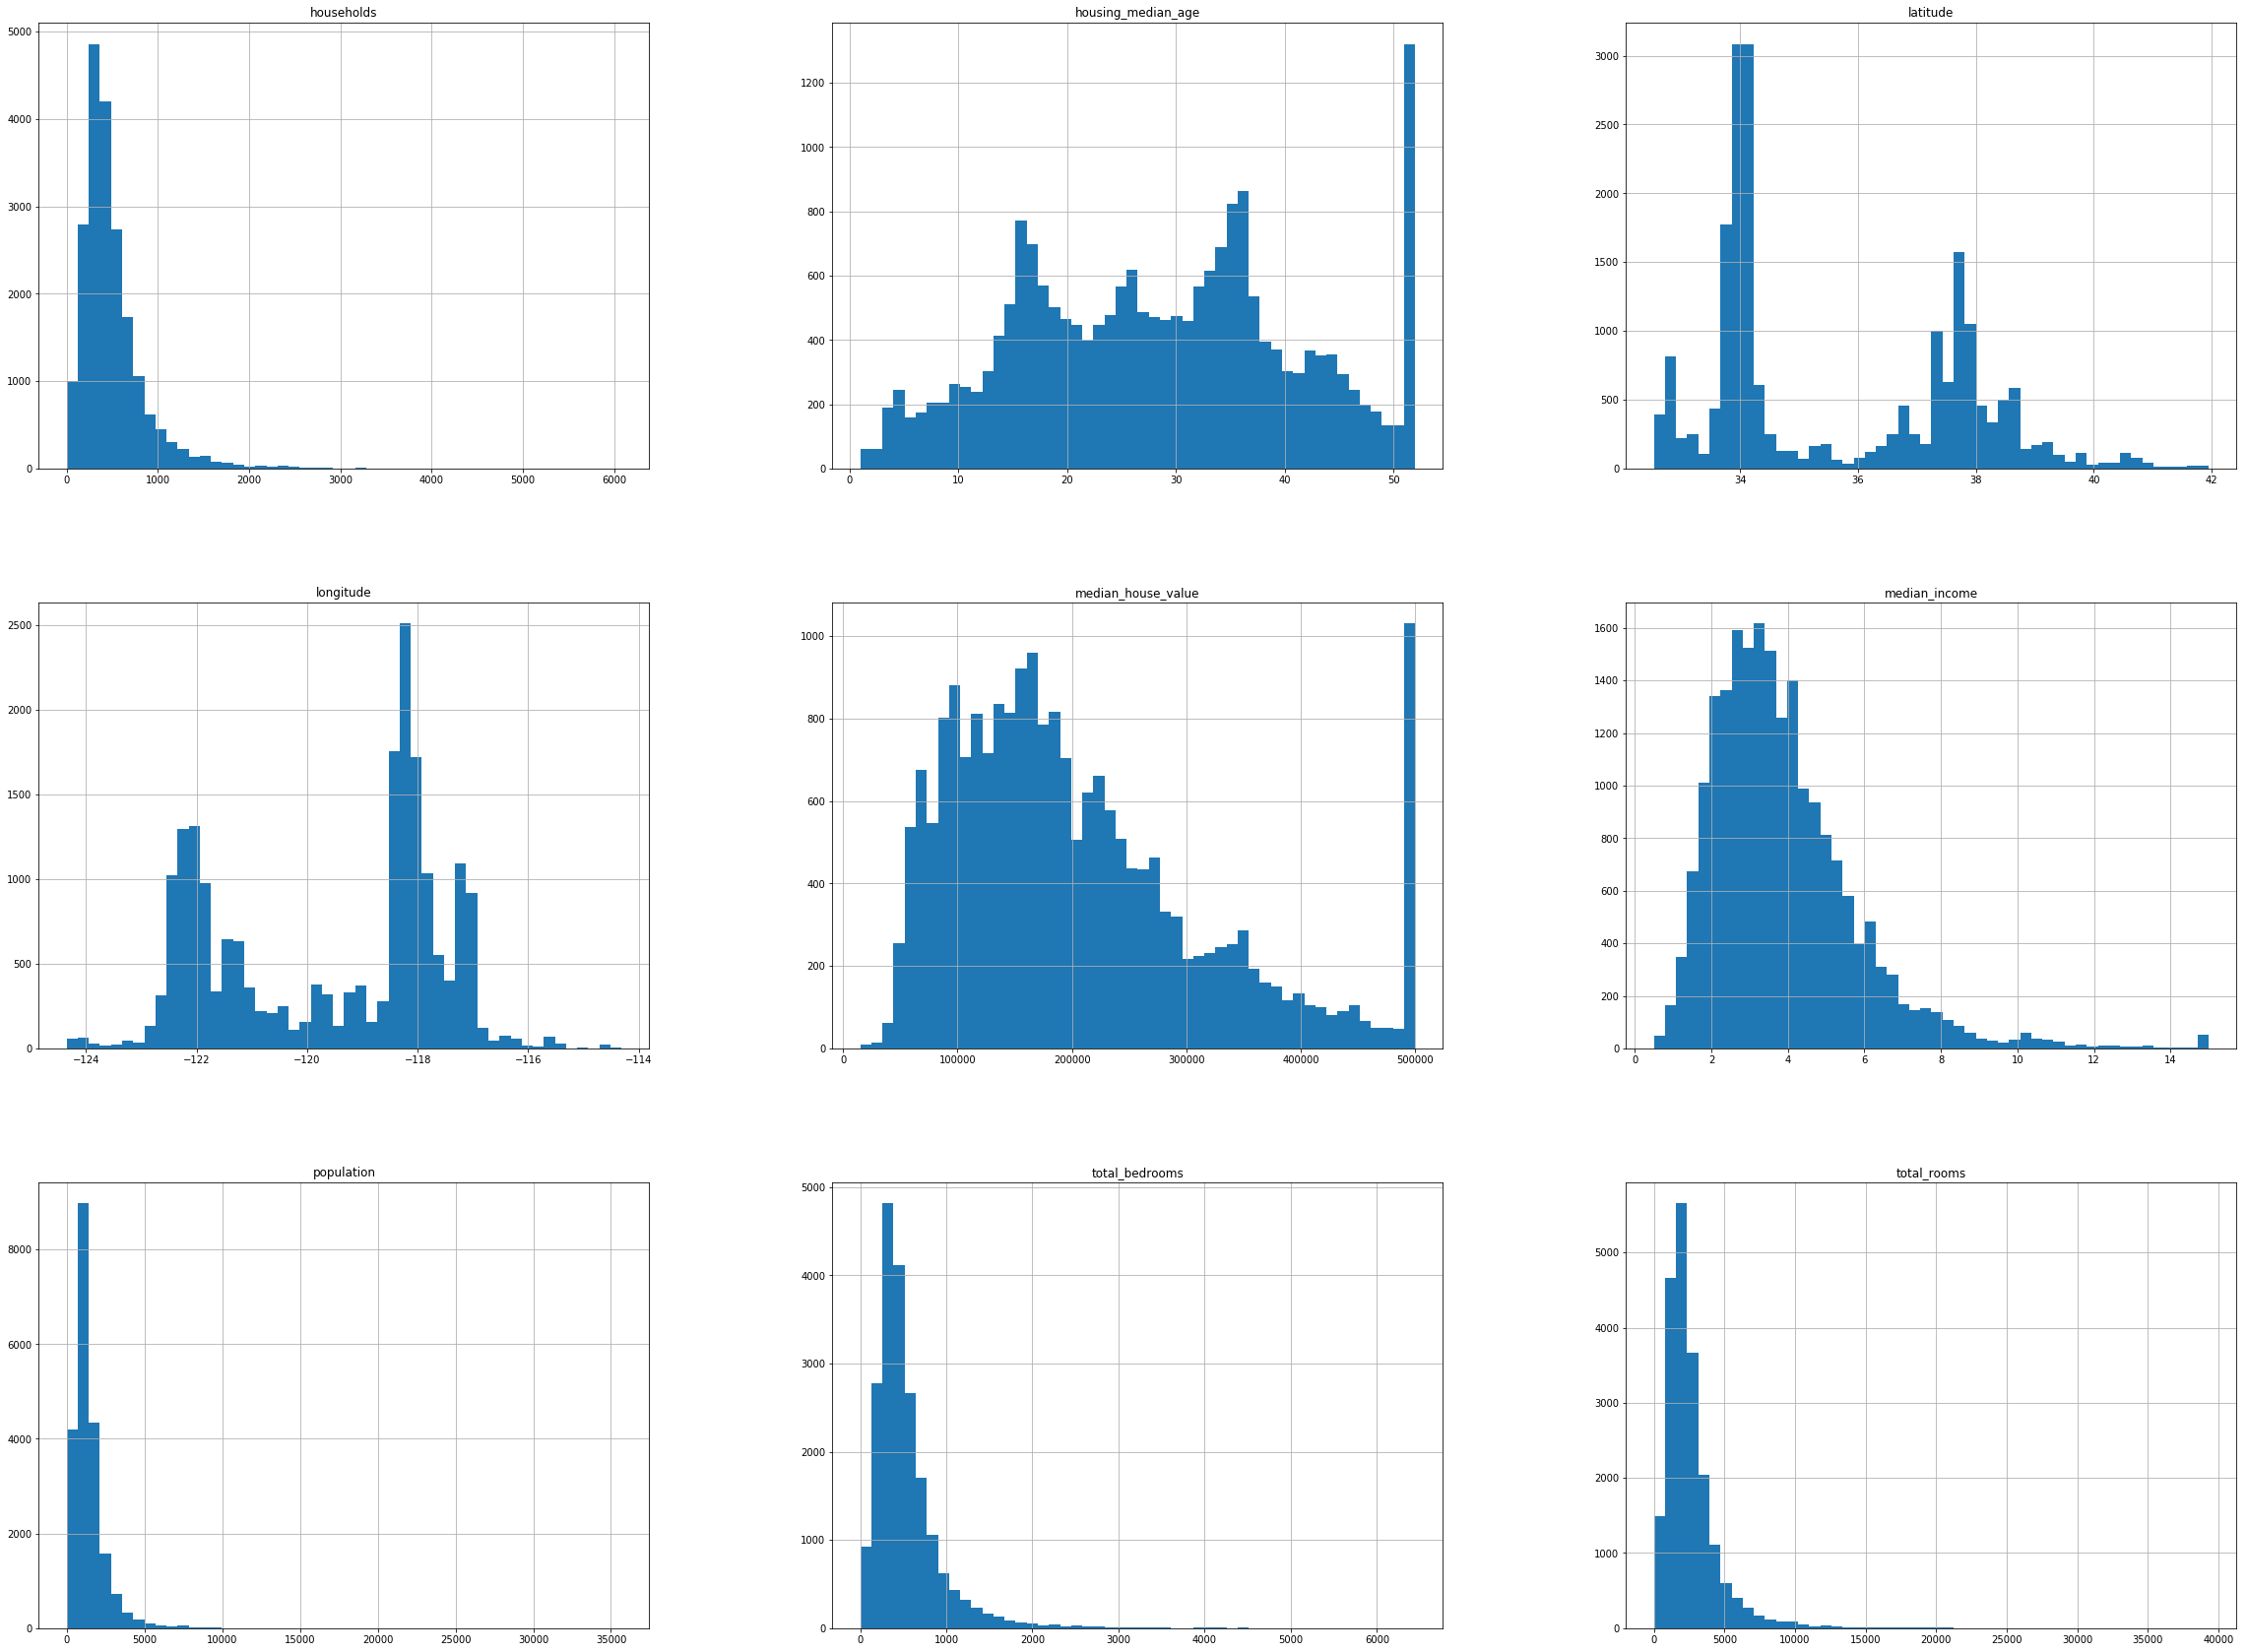

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50, figsize=(40, 30))
plt.show()

Let's pick a test set

In [172]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [173]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [174]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [175]:
print("Train:" + str(train_set.shape))
print("Test:" + str(test_set.shape))

Train:(16512, 10)
Test:(4128, 10)


Let's create an income category

In [176]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [177]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [178]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [179]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [180]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [181]:
housing = strat_train_set.copy()

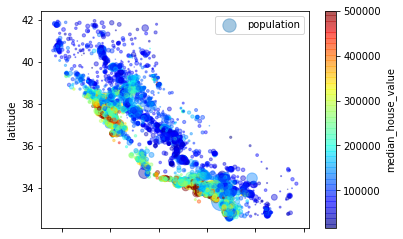

In [182]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [183]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe39a844198>,
      dtype=object)

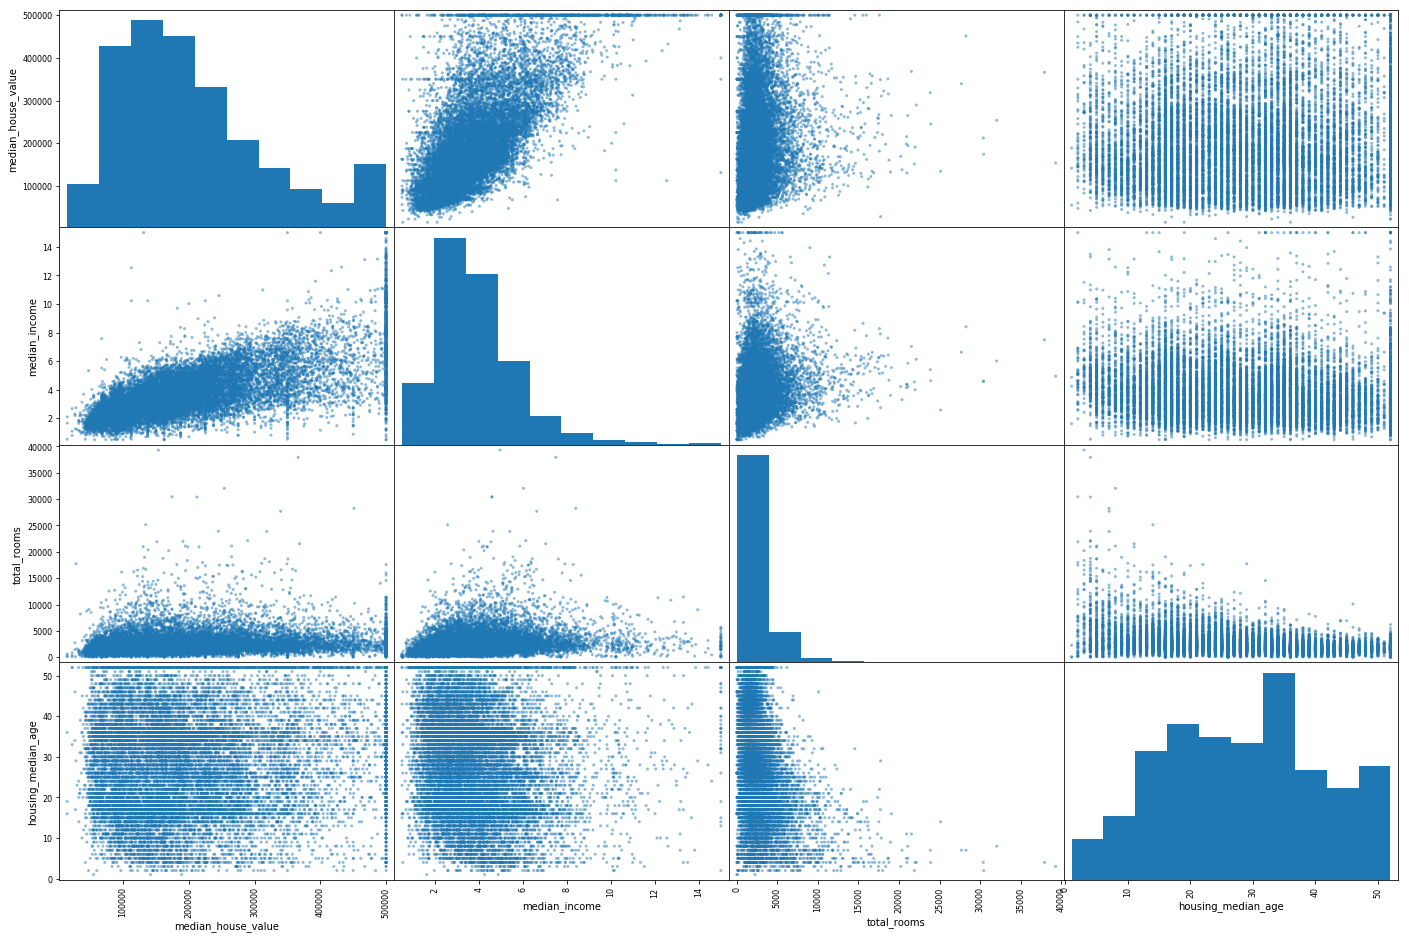

In [184]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
             "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(24, 16))


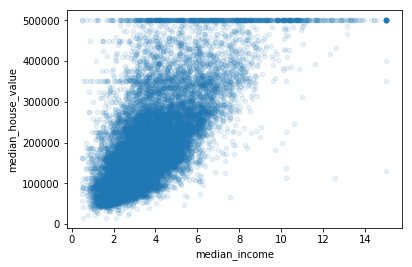

In [185]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
                alpha=0.1)

In [186]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [187]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [188]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [189]:
# Filling Nan values:
# Drops corresponding districts
# housing.dropna(subset=["total_bedrooms])
# Drops the whole column
# housing.drop("total_bedrooms", axis=1)
# Set values to median
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median|)

In [190]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [191]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [192]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [193]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [194]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [195]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [196]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [197]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [198]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [199]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_houseold = X[:, population_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_houseold, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_houseold, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 2.094395280235988,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 2.7079646017699117,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 2.0259740259740258,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 2.742483660130719,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 3.808988764044944,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 1.9859154929577465,
        1.9859154929577465]], dtype=object)

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.08649871,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.03353391,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.09240499,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ..., -0.03055414,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.06150916,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.09586294,
        -0.09586294,  0.10180567]])

In [201]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [206]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [207]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [208]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [210]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [211]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [210720. 318336. 210720.  59136. 187264.]


In [212]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68827.26447438156

In [213]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [215]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, 
                        housing_labels, scoring='neg_mean_squared_error',
                        cv = 10)
rmse_scores = np.sqrt(-scores)

array([69248.51836363, 68193.40107668, 70471.84343537, 70966.78438658,
       71520.56829978, 73727.34646821, 69265.04378928, 69949.68329461,
       74154.59502346, 69273.14282216])

In [216]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [217]:
display_scores(rmse_scores)

Scores:  [69248.51836363 68193.40107668 70471.84343537 70966.78438658
 71520.56829978 73727.34646821 69265.04378928 69949.68329461
 74154.59502346 69273.14282216]
Mean:  70677.09269597605
Standard deviation:  1869.176305879086


In [218]:
lin_scores = cross_val_score(lin_reg, housing_prepared,
                            housing_labels,
                            scoring='neg_mean_squared_error',
                            cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66870.29720652 67233.29411078 70152.71588206 74951.14503731
 67809.7619134  71294.59349397 65186.41588092 68217.95468433
 72369.85455155 67741.00508242]
Mean:  69182.70378432605
Standard deviation:  2807.9492647641287


In [219]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22126.07437735503

In [221]:
forest_scores = cross_val_score(forest_reg, housing_prepared,
                               housing_labels,
                               scoring='neg_mean_squared_error',
                               cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [50715.75452257 49822.56423961 52643.65645842 55484.77365281
 53001.53605786 55357.71033224 50711.80599182 50935.24121692
 55018.11656589 52537.20431493]
Mean:  52622.8363353065
Standard deviation:  1988.3980305635698


In [222]:
# Saving a model:
# from sklearn.externals import joblib
# joblib.dump(my_model, "my_model.pkl")
# my_model_loaded = joblib.load("my_model.pkl")

In [228]:
# Search for the best hyperparametes
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30, 50]}, {'max_features': [2, 3, 4], 'bootstrap': [False], 'n_estimators': [3, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [229]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [230]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [231]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64365.37766340931 {'max_features': 2, 'n_estimators': 3}
55210.48795128446 {'max_features': 2, 'n_estimators': 10}
52974.401365137164 {'max_features': 2, 'n_estimators': 30}
52385.062691773484 {'max_features': 2, 'n_estimators': 50}
60957.56588471665 {'max_features': 4, 'n_estimators': 3}
53325.89756059531 {'max_features': 4, 'n_estimators': 10}
50944.625019175895 {'max_features': 4, 'n_estimators': 30}
50831.69983455685 {'max_features': 4, 'n_estimators': 50}
59423.79884351473 {'max_features': 6, 'n_estimators': 3}
52863.44801915814 {'max_features': 6, 'n_estimators': 10}
50763.39585358728 {'max_features': 6, 'n_estimators': 30}
50177.30890223496 {'max_features': 6, 'n_estimators': 50}
58720.38459994851 {'max_features': 8, 'n_estimators': 3}
52555.00079739222 {'max_features': 8, 'n_estimators': 10}
50454.22880134561 {'max_features': 8, 'n_estimators': 30}
50229.46082631256 {'max_features': 8, 'n_estimators': 50}
61485.68375351283 {'max_features': 2, 'bootstrap': False, 'n_estimators':

In [232]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.61211324e-02, 6.89025883e-02, 4.29389115e-02, 1.85860671e-02,
       1.74465545e-02, 1.77754982e-02, 1.76907827e-02, 3.67303636e-01,
       6.85776559e-02, 6.63401990e-02, 8.55141650e-02, 1.54222189e-02,
       1.27500630e-01, 4.92785283e-05, 3.15189745e-03, 6.67878399e-03])

In [233]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold','bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36730363645949604, 'median_income'),
 (0.12750063013394372, 'INLAND'),
 (0.08551416500959182, 'bedrooms_per_room'),
 (0.07612113237137351, 'longitude'),
 (0.06890258829250119, 'latitude'),
 (0.06857765585195388, 'rooms_per_hhold'),
 (0.06634019900893556, 'pop_per_hhold'),
 (0.04293891145095793, 'housing_median_age'),
 (0.018586067110503722, 'total_rooms'),
 (0.017775498199397492, 'population'),
 (0.017690782700263773, 'households'),
 (0.017446554528990153, 'total_bedrooms'),
 (0.015422218910948532, '<1H OCEAN'),
 (0.006678783991317106, 'NEAR OCEAN'),
 (0.003151897451485483, 'NEAR BAY'),
 (4.9278528339989724e-05, 'ISLAND')]

In [241]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48174.83788725455

In [246]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(housing_prepared, housing_labels)

housing_predictions = svr.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

118569.21349938153

In [250]:
param_grid = [
    {'kernel': ['linear'], 'C': [1., 10., 100.0]},
    {'kernel': ['rbf'], 'C': [0.6, 0.8, 1.0], 
            'gamma': [0.6, 0.8, 1.0]}
]


svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5,
                          scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] kernel=linear, C=1.0 ............................................
[CV] ............................. kernel=linear, C=1.0, total=   7.7s
[CV] kernel=linear, C=1.0 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV] ............................. kernel=linear, C=1.0, total=   7.7s
[CV] kernel=linear, C=1.0 ............................................
[CV] ............................. kernel=linear, C=1.0, total=   7.7s
[CV] kernel=linear, C=1.0 ............................................
[CV] ............................. kernel=linear, C=1.0, total=   7.7s
[CV] kernel=linear, C=1.0 ............................................
[CV] ............................. kernel=linear, C=1.0, total=   7.8s
[CV] kernel=linear, C=10.0 ...........................................
[CV] ............................ kernel=linear, C=10.0, total=   7.3s
[CV] kernel=linear, C=10.0 ...........................................
[CV] ............................ kernel=linear, C=10.0, total=   7.5s
[CV] kernel=linear, C=10.0 ...........................................
[CV] ............................ kernel=linear, C=10.0, total=   7.4s
[CV] kernel=linear, C=10.0 ...........................................
[CV] .

[CV] ..................... gamma=1.0, kernel=rbf, C=1.0, total=  12.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 44.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1.0, 10.0, 100.0]}, {'gamma': [0.6, 0.8, 1.0], 'kernel': ['rbf'], 'C': [0.6, 0.8, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [251]:
grid_search.best_params_

{'C': 100.0, 'kernel': 'linear'}

In [252]:
grid_search.best_estimator_

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)